# L02: Perceptrons

Implementation of the classic Perceptron by Frank Rosenblatt for binary classification (here: 0/1 class labels) in NumPy

## Imports

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
cd '/content/drive/MyDrive/Courses/AI/Lecture01'

/content/drive/MyDrive/Courses/AI/Lecture01


In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing a toy dataset

In [44]:
##########################
### DATASET
##########################

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2]
y = y.astype(int)
y[y==0] = -1

print('Class label counts:')
print(np.unique(y, return_counts=True))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts:
(array([-1,  1]), array([50, 50]))
X.shape: (100, 2)
y.shape: (100,)


In [45]:
X_train.std(axis=0)

array([1., 1.])

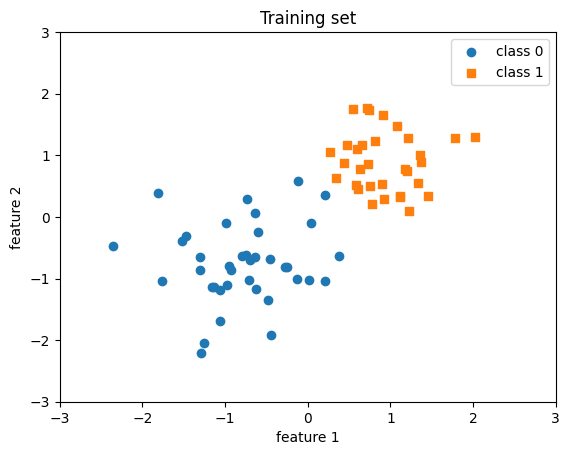

In [46]:
plt.scatter(X_train[y_train==-1, 0], X_train[y_train==-1, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

## Defining the Perceptron model

In [47]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=float)
        self.bias = np.zeros(1, dtype=float)
        self.learning_rate = learning_rate

    def forward(self, x):
        linear = np.dot(x,self.weights) + self.bias  # Compute net input
        predictions = np.where(linear > 0., 1, -1)
        return predictions

    def backward(self, x, y):
        linear = np.dot(x,self.weights) + self.bias  # Compute net input
        cost = -y*linear
        if cost<0:
          errors = 0
        else:
          errors = 1
        grad_w = -1*errors*y*x
        grad_b = -1*errors*y
        return grad_w, grad_b

    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                grad_w, grad_b = self.backward(x[i].reshape(1,self.num_features), y[i])
                self.weights -= grad_w.reshape(self.num_features, 1)
                self.bias -= grad_b

    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy

## Training the Perceptron

In [48]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights)
print('  Bias: %s\n' % ppn.bias)

Model parameters:


  Weights: [[1.27340847]
 [1.34642288]]

  Bias: [-1.]



## Evaluating the model

In [49]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 100.00%


In [50]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


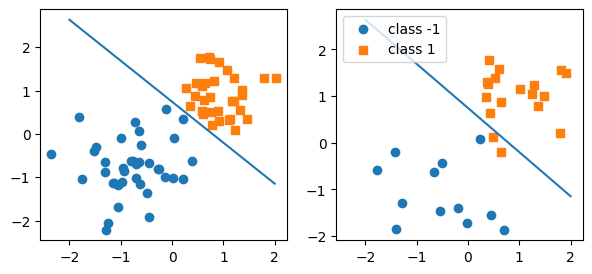

In [51]:
##########################
### 2D Decision Boundary
##########################

w, b = ppn.weights, ppn.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0])
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0])
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[0].scatter(X_train[y_train==-1, 0], X_train[y_train==-1, 1], label='class -1', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].scatter(X_test[y_test==-1, 0], X_test[y_test==-1, 1], label='class -1', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()